In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
import xgboost as xg
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import math

In [2]:
AB="C:/Users/ganes/onedrive/Desktop/AI/DMFC/JMC-Data.xlsx"
df=pd.read_excel(AB)
df.head(5)
df=pd.read_excel(AB)
df.head(5)
df.shape


(364, 36)

In [3]:
A=df['GP']
B=df["GE"]
C = df['CQD']
D = df['SWNT']
E = df["MWNT"]
F=df['CNF']
G=df["MC"]
H = df['CB']
I = df['N2']
J=df['SU']
K=df["CuO"]
L = df['CeO2']
M=df['MnO2']
N= df['MoO3']
O= df['Mn3O4']
P=df["WO3"]
Q=df["Au"]
R=df["Co"]
S=df["Cu"]
T=df["Fe"]
U=df["Ir"]
V=df['Ni']
W= df['Pd']
X= df['Pt']
Y=df["Ru"]
Z=df["SnO2"]
AA=df["TiO2"]
BB=df["Zn"]
CC=df["HPMO"]
DD=df['HSO']
EE= df['HClO']
FF= df['OH']
GG=df["MEOH"]
HH=df["SR"]
List = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W, X,Y,Z,AA,BB,CC,DD,EE,FF,GG,HH]
List1=pd.concat(List, axis=1, sort=True)
List1.head(5)
List1.shape


(364, 34)

In [4]:
from sklearn import preprocessing
AB = preprocessing.MinMaxScaler()
BC=AB.fit_transform(List1)
CD=pd.DataFrame(BC, columns=List1.columns[:])
CD.head(5)

,GP,GE,CQD,SWNT,MWNT,CNF,MC,CB,N2,SU,...,Ru,SnO2,TiO2,Zn,HPMO,HSO,HClO,OH,MEOH,SR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.606061,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.473684,0.242424
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.606061,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.473684,0.242424
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.606061,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.473684,0.242424
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.606061,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.473684,0.242424
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.606061,0.0,0.0,...,0.56,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.473684,0.090909


In [5]:
import seaborn as sns

C:\Users\ganes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ganes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ganes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ganes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

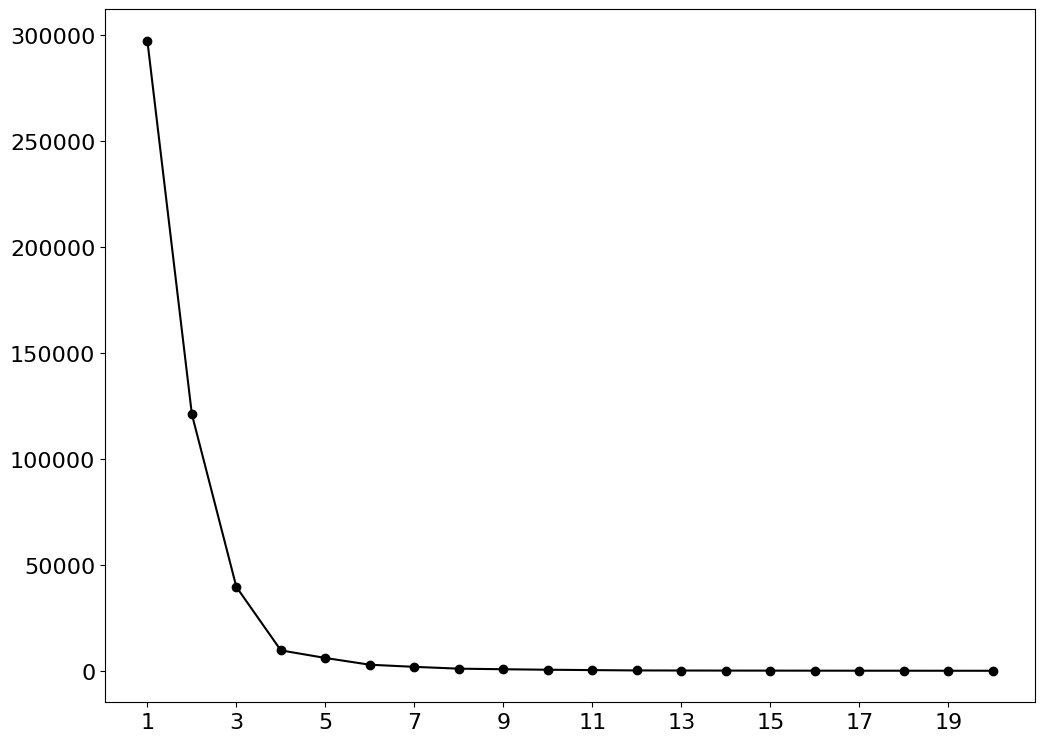

In [7]:
sse = []
for E in range(1,21):
    kmeans = KMeans(n_clusters=E)
    kmeans.fit(List1)
    score = kmeans.score(List1)
    sse.append([E, kmeans.inertia_])

plt.figure(figsize=(12,9))
plt.xticks(range(1, 21, 2))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.tick_params(labelsize=16)
plt.plot(pd.DataFrame(sse)[0],  pd.DataFrame(sse)[1], "k", marker="o")

C:\Users\ganes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


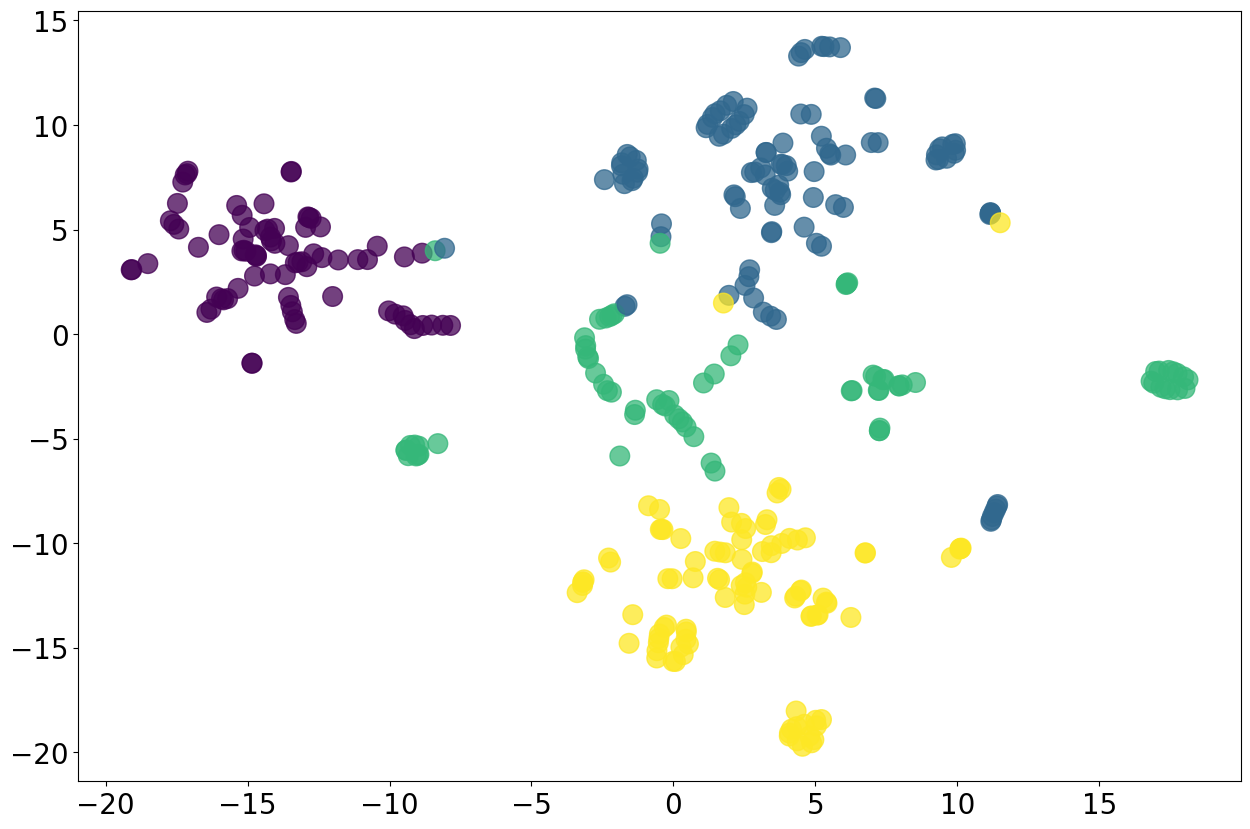

In [8]:
cluster = KMeans(n_clusters=4)
cluster.fit(CD)
cluster_predictions = cluster.predict(CD)
tsne = TSNE(n_components=2, random_state=1, n_iter=1000, perplexity=40, init="pca", learning_rate="auto")
tsne_EP = tsne.fit_transform(CD)
plt.figure(figsize=(15,10))
plot2 = plt.scatter(x=tsne_EP[:,0], y=tsne_EP[:,1], c=cluster_predictions, s=200, alpha=0.75)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.show() 